# Time Series

This section will walk through simple time series analysis, and forecasting

In [ ]:
%matplotlib inline
from fbprophet import Prophet
import numpy as np
import pandas as pd


In [4]:
%%time
# Resampling data from minute interval to day
bit_df = pd.read_csv('../data/coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]

CPU times: user 2.5 s, sys: 411 ms, total: 2.91 s
Wall time: 3.07 s


In [5]:
# needs ds and y columns
ts = (bit_df
    .reset_index()
    .rename(columns={'date': 'ds', 'close': 'y'})
[['ds', 'y']]
)

In [6]:
ts.dtypes


ds    datetime64[ns]
y            float64
dtype: object

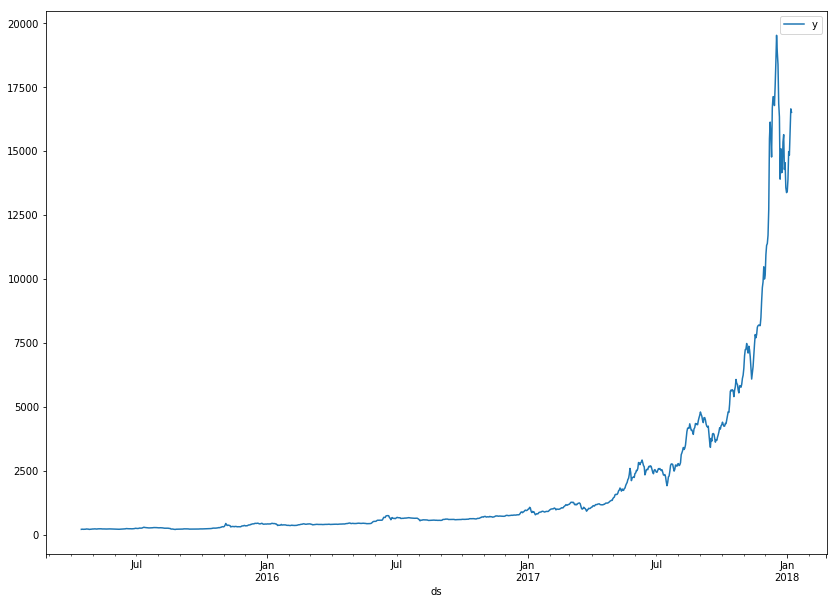

In [7]:
ts.set_index('ds').plot(figsize=(14,10))

In [8]:
m = Prophet(daily_seasonality=True)
m.fit(ts)

/Users/matt/work/courses/machine-learning-with-python-clustering/.env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
# Make a future object and predict into it
future = m.make_future_dataframe(periods=24)
forecast = m.predict(future)
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2015-04-15,-273.044695,-273.044695,-273.044695,-902.926466,613.696246,-1987.080353,-1987.080353,-1987.080353,125.669122,...,125.669122,125.669122,125.669122,4.727725,4.727725,4.727725,2108.021750,2108.021750,2108.021750,-147.375573
1,2015-04-16,-238.710416,-238.710416,-238.710416,-881.024840,630.043012,-1987.080353,-1987.080353,-1987.080353,106.724749,...,106.724749,106.724749,106.724749,4.930275,4.930275,4.930275,2088.874826,2088.874826,2088.874826,-131.985667
2,2015-04-17,-204.376137,-204.376137,-204.376137,-859.691274,689.125177,-1987.080353,-1987.080353,-1987.080353,83.793457,...,83.793457,83.793457,83.793457,1.969590,1.969590,1.969590,2068.904219,2068.904219,2068.904219,-120.582680
3,2015-04-18,-170.041858,-170.041858,-170.041858,-857.817407,623.748029,-1987.080353,-1987.080353,-1987.080353,66.496451,...,66.496451,66.496451,66.496451,5.201692,5.201692,5.201692,2048.375112,2048.375112,2048.375112,-103.545407
4,2015-04-19,-135.707579,-135.707579,-135.707579,-772.081979,639.000679,-1987.080353,-1987.080353,-1987.080353,32.214481,...,32.214481,32.214481,32.214481,-8.250092,-8.250092,-8.250092,2027.544926,2027.544926,2027.544926,-103.493098
5,2015-04-20,-101.373299,-101.373299,-101.373299,-820.487249,622.432977,-1987.080353,-1987.080353,-1987.080353,11.460516,...,11.460516,11.460516,11.460516,-8.113404,-8.113404,-8.113404,2006.654272,2006.654272,2006.654272,-89.912784
6,2015-04-21,-67.039020,-67.039020,-67.039020,-869.100528,713.961541,-1987.080353,-1987.080353,-1987.080353,-1.627380,...,-1.627380,-1.627380,-1.627380,-0.465785,-0.465785,-0.465785,1985.918757,1985.918757,1985.918757,-68.666401
7,2015-04-22,-32.704741,-32.704741,-32.704741,-818.128199,716.578353,-1987.080353,-1987.080353,-1987.080353,-16.830735,...,-16.830735,-16.830735,-16.830735,4.727725,4.727725,4.727725,1965.521893,1965.521893,1965.521893,-49.535476
8,2015-04-23,1.629538,1.629538,1.629538,-799.125125,704.627552,-1987.080353,-1987.080353,-1987.080353,-36.540733,...,-36.540733,-36.540733,-36.540733,4.930275,4.930275,4.930275,1945.609345,1945.609345,1945.609345,-34.911195
9,2015-04-24,35.963817,35.963817,35.963817,-865.926461,720.503592,-1987.080353,-1987.080353,-1987.080353,-58.826090,...,-58.826090,-58.826090,-58.826090,1.969590,1.969590,1.969590,1926.284673,1926.284673,1926.284673,-22.862273


In [10]:
forecast.T

,0,1,2,3,4,5,6,7,8,9,...,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
ds,2015-04-15 00:00:00,2015-04-16 00:00:00,2015-04-17 00:00:00,2015-04-18 00:00:00,2015-04-19 00:00:00,2015-04-20 00:00:00,2015-04-21 00:00:00,2015-04-22 00:00:00,2015-04-23 00:00:00,2015-04-24 00:00:00,...,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-24 00:00:00,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-01-27 00:00:00,2018-01-28 00:00:00,2018-01-29 00:00:00,2018-01-30 00:00:00,2018-01-31 00:00:00
trend,-273.045,-238.71,-204.376,-170.042,-135.708,-101.373,-67.039,-32.7047,1.62954,35.9638,...,17280.9,17344,17407,17470.1,17533.2,17596.3,17659.4,17722.5,17785.6,17848.7
trend_lower,-273.045,-238.71,-204.376,-170.042,-135.708,-101.373,-67.039,-32.7047,1.62954,35.9638,...,17239.3,17290.8,17342.1,17394.5,17447.8,17497.3,17551.2,17593.3,17643.9,17694.4
trend_upper,-273.045,-238.71,-204.376,-170.042,-135.708,-101.373,-67.039,-32.7047,1.62954,35.9638,...,17314.3,17389.1,17465.6,17544.4,17617.4,17696.6,17775.1,17854.2,17930.3,18014.2
yhat_lower,-902.926,-881.025,-859.691,-857.817,-772.082,-820.487,-869.101,-818.128,-799.125,-865.926,...,16234.4,16275,16447.8,16446.2,16567,16667.7,16731.9,16829.6,16888.6,17002.1
yhat_upper,613.696,630.043,689.125,623.748,639.001,622.433,713.962,716.578,704.628,720.504,...,17731.2,17871.9,17989.9,18173.3,18146.2,18246,18252.8,18386.4,18476,18577.5
daily,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,...,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08
daily_lower,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,...,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08
daily_upper,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,...,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08,-1987.08
seasonal,125.669,106.725,83.7935,66.4965,32.2145,11.4605,-1.62738,-16.8307,-36.5407,-58.8261,...,-334.614,-280.873,-235.239,-200.393,-174.491,-147.996,-143.456,-130.134,-113.525,-102.918


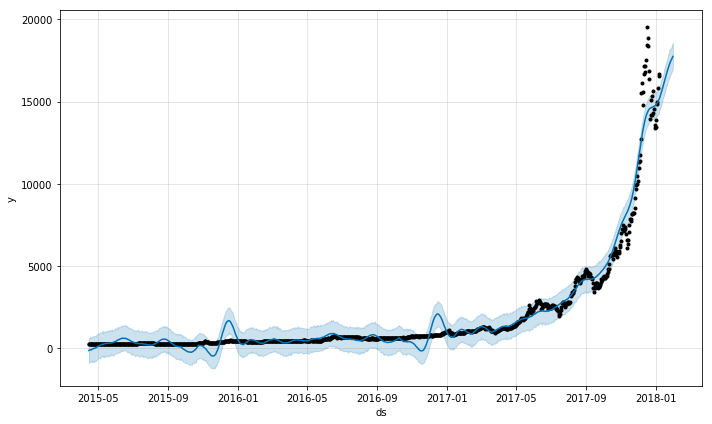

In [11]:
# plot the prediction, include the uncertainty lines
ax = m.plot(forecast, uncertainty=True)

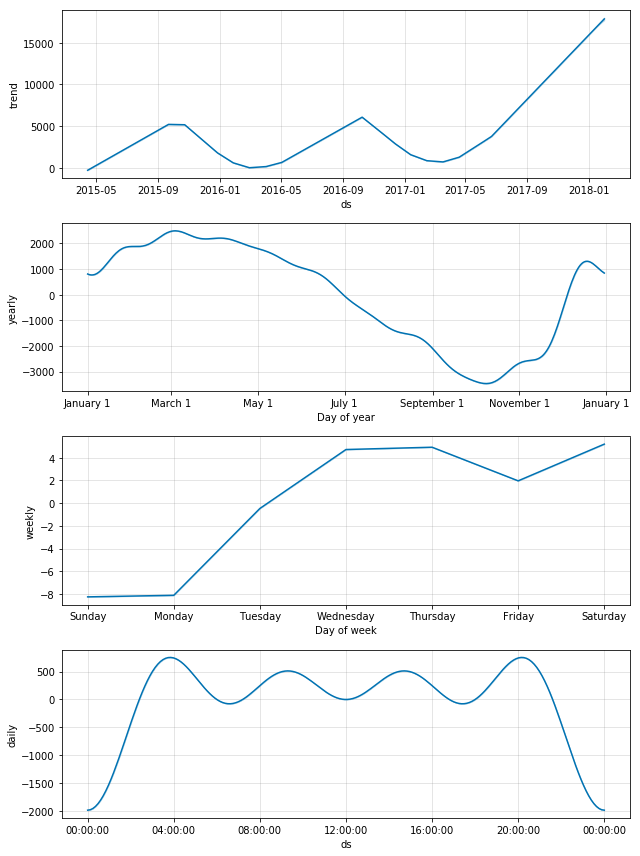

In [12]:
# look at the trend, yearly, weekly and daily componentsb
ax = m.plot_components(forecast)

## Exercise - Snow Data

* Use prophet to predict 100 days in the future of Snow Depth (SNWD) 
* What month has the most snow

Data from https://www.ncdc.noaa.gov/cdo-web/search

Data at ``../data/snow-alta-1990-2017.csv``

Documentation - https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf


* STATION_NAME (max 50 characters) is the (usually city/airport name). Optional
output field.
* STATION - 17 characters) is the station identification code. Please see
http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt
* NAME - name of the station
* LATITUDE
* LONGITUDE
* ELEVATION - meters
* DATE - YYYY-MM-DD
* DAPR - Number of days included in the multiday precipitation total (MDPR)
* DAPR_ATTRIBUTES
* DASF - Number of days included in the multiday snowfall total (MDSF)
* DASF_ATTRIBUTES 
* MDPR -  Multiday precipitation total (mm or inches as per user preference; use with DAPR and DWPR, if
available)
* MDPR_ATTRIBUTES
* MDSF - Multiday snowfall total (mm or inches as per user preference)
* MDSF_ATTRIBUTES
* PRCP - Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
* PRCP_ATTRIBUTES 
* SNOW -  Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
* SNOW_ATTRIBUTES
* SNWD -  Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)
* SNWD_ATTRIBUTES
* TMAX - Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file
* TMAX_ATTRIBUTES 
* TMIN - Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file
* TMIN_ATTRIBUTES
* TOBS - Temperature at the time of observation (Fahrenheit or Celsius as per user preference)
* TOBS_ATTRIBUTES
* WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
* WT01_ATTRIBUTES
* WT03 - Thunder
* WT03_ATTRIBUTES
* WT04 - Ice pellets, sleet, snow pellets, or small hail
* WT04_ATTRIBUTES
* WT05 -  Hail (may include small hail)
* WT05_ATTRIBUTES
* WT06 - Glaze or rime
* WT06_ATTRIBUTES
* WT11 -  High or damaging winds
* WT11_ATTRIBUTES

In [14]:
!head ../data/snow-alta-1990-2017.csv


"STATION","NAME","LATITUDE","LONGITUDE","ELEVATION","DATE","DAPR","DAPR_ATTRIBUTES","DASF","DASF_ATTRIBUTES","MDPR","MDPR_ATTRIBUTES","MDSF","MDSF_ATTRIBUTES","PRCP","PRCP_ATTRIBUTES","SNOW","SNOW_ATTRIBUTES","SNWD","SNWD_ATTRIBUTES","TMAX","TMAX_ATTRIBUTES","TMIN","TMIN_ATTRIBUTES","TOBS","TOBS_ATTRIBUTES","WT01","WT01_ATTRIBUTES","WT03","WT03_ATTRIBUTES","WT04","WT04_ATTRIBUTES","WT05","WT05_ATTRIBUTES","WT06","WT06_ATTRIBUTES","WT11","WT11_ATTRIBUTES"
"USC00420072","ALTA, UT US","40.5905","-111.6369","2660.9","1990-01-01",,,,,,,,,"0.00","P,,0,1600","0.0","P,,0,","38",",,0,","38",",,0","11",",,0","30",",,0,1600",,,,,,,,,,,,
"USC00420072","ALTA, UT US","40.5905","-111.6369","2660.9","1990-01-02",,,,,,,,,"0.53",",,0,1600","17.0",",,0,","55",",,0,","30",",,0","11",",,0","11",",,0,1600",,,,,,,,,,,,
"USC00420072","ALTA, UT US","40.5905","-111.6369","2660.9","1990-01-03",,,,,,,,,"0.08",",,0,1600","4.0",",,0,","51",",,0,","13",",,0","-5",",,0","11",",,0,1600",,,,,,,,,,,,
"USC00420072","ALTA

In [16]:
snow = pd.read_csv('../data/snow-alta-1990-2017.csv', parse_dates=['DATE'] )

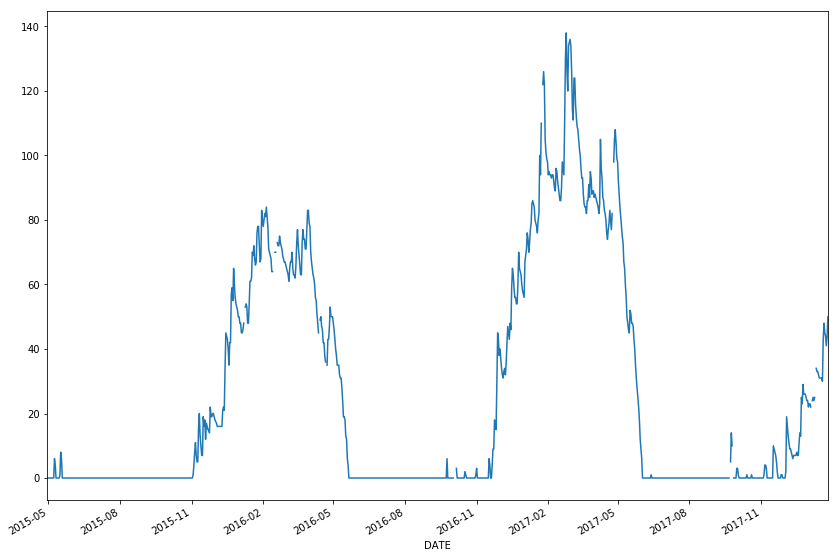

In [31]:
snow.set_index('DATE').SNWD.iloc[-1000:].plot(figsize=(14,10))

In [17]:
snow_ts = (
snow
#.set_index('DATE')
.rename(columns={'SNWD':'y', 'DATE': 'ds'})
[['ds', 'y']]    
)


/Users/matt/work/courses/machine-learning-with-python-clustering/.env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


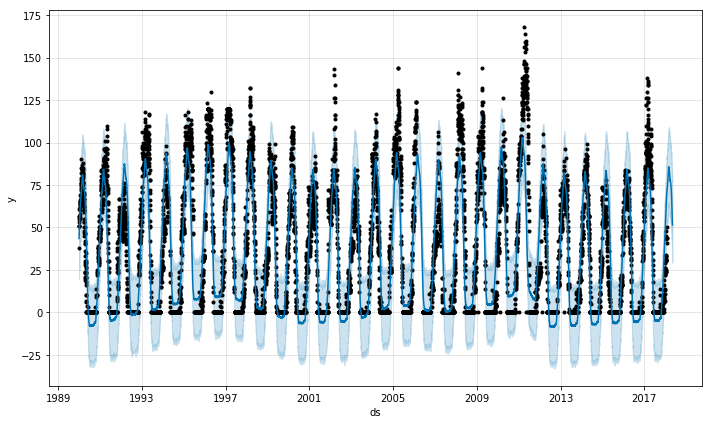

In [18]:
snow_m = Prophet(daily_seasonality=False)
snow_m.fit(snow_ts)
# Make a future object and predict into it
snow_future = snow_m.make_future_dataframe(periods=100)
snow_forecast = snow_m.predict(snow_future)
ax = snow_m.plot(snow_forecast, uncertainty=True)

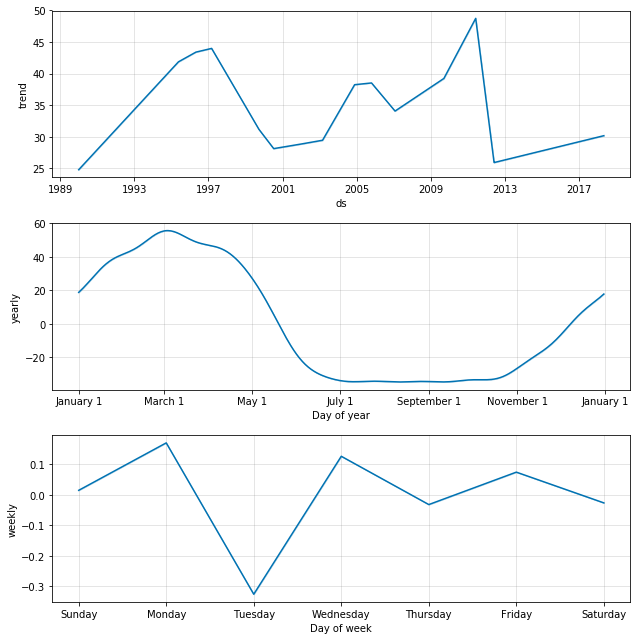

In [19]:
ax = snow_m.plot_components(snow_forecast)

## Try using log of data

Prediction may work better if we tweak the data. In this case let's try taking the log of the bitcoin price

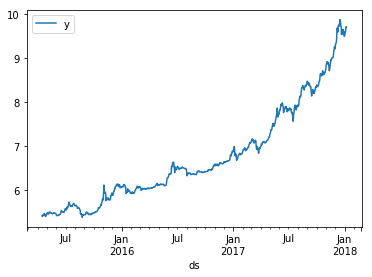

In [20]:
ts2 = ts.assign(y=lambda x: np.log(x.y))
ts2.set_index('ds').plot()

In [21]:
m2 = Prophet() #dont need daily_seasonality=True)
m2.fit(ts2)
future2 = m2.make_future_dataframe(periods=24)
forecast2 = m2.predict(future2)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/matt/work/courses/machine-learning-with-python-clustering/.env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


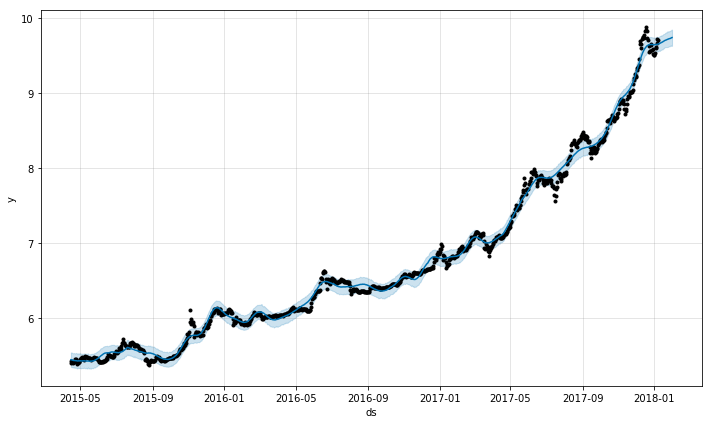

In [22]:
# plot the prediction, include the uncertainty lines
ax = m2.plot(forecast2, uncertainty=True)

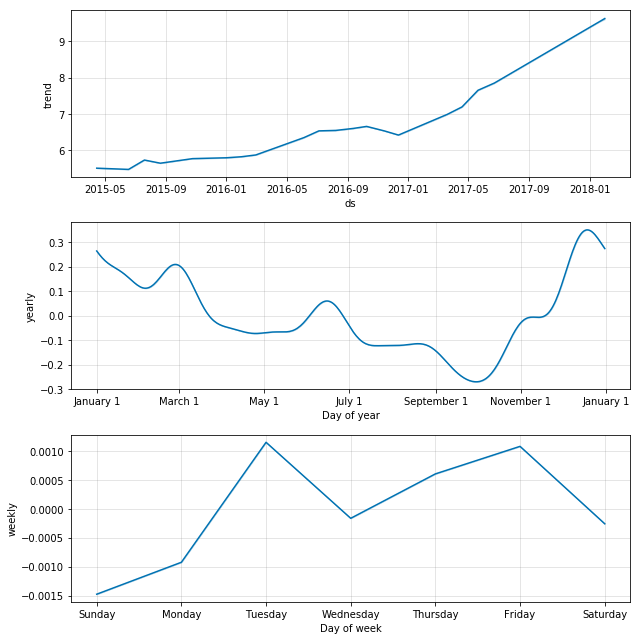

In [24]:
ax = m2.plot_components(forecast2)

## Exercise - Log of Time Series

* Run the snow calculation using the log of the snow depth. Does it track better? (Hint: might need to add 1 before logging)

/Users/matt/work/courses/machine-learning-with-python-clustering/.env/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


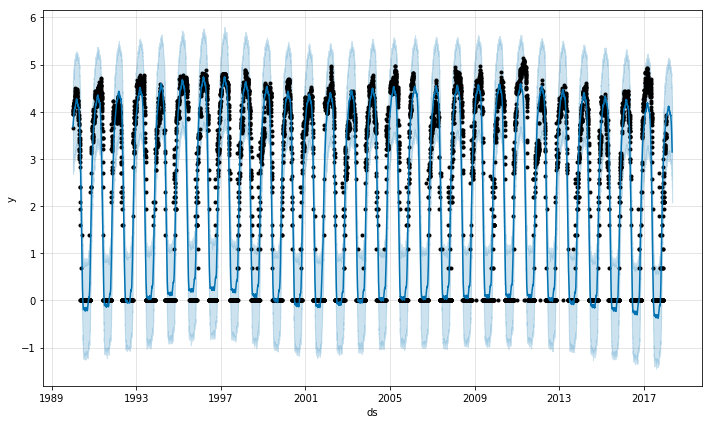

In [25]:
snow_log = (snow_ts
           .assign(y=lambda x: np.log(x.y+1)))
snow_m2 = Prophet(daily_seasonality=False)
snow_m2.fit(snow_log)
# Make a future object and predict into it
snow_future2 = snow_m2.make_future_dataframe(periods=100)
snow_forecast2 = snow_m2.predict(snow_future2)
ax = snow_m2.plot(snow_forecast2, uncertainty=True)

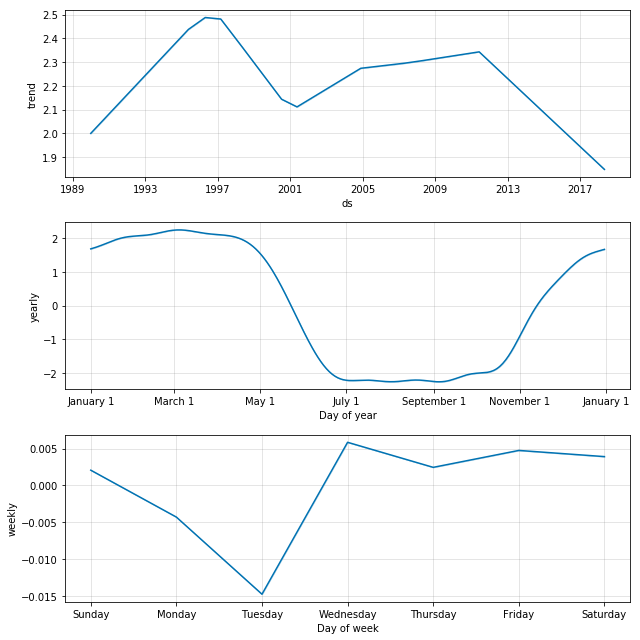

In [26]:
ax = snow_m2.plot_components(snow_forecast2)